In [9]:
%pip install scipy
 

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore



In [11]:
tech_support = pd.read_csv('./technical_support_data.csv')
tech_support.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [12]:
tech_support.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [13]:
tech_support.shape

(23, 8)

In [14]:
tech_support.isnull().sum()

PROBLEM_TYPE             0
no_of_cases              0
Avg_pending_calls        0
Avg_resol_time           0
recurrence_freq          0
Replace_percent          0
In_warranty_percent      0
Post_warranty_percent    0
dtype: int64

In [17]:
tech_support.describe().all

<bound method DataFrame.all of        no_of_cases  Avg_pending_calls  Avg_resol_time  recurrence_freq  \
count    23.000000          23.000000       23.000000        23.000000   
mean    142.782609           1.973913       63.000000         0.137826   
std     155.098197           0.982676       58.877376         0.118627   
min       3.000000           1.000000        5.000000         0.010000   
25%      23.500000           1.150000       17.000000         0.025000   
50%      72.000000           2.000000       35.000000         0.140000   
75%     211.500000           2.300000      128.500000         0.235000   
max     520.000000           4.300000      180.000000         0.350000   

       Replace_percent  In_warranty_percent  Post_warranty_percent  
count        23.000000            23.000000              23.000000  
mean          0.100000            69.956522              30.043478  
std           0.182109            37.350281              37.350281  
min           0.000000    

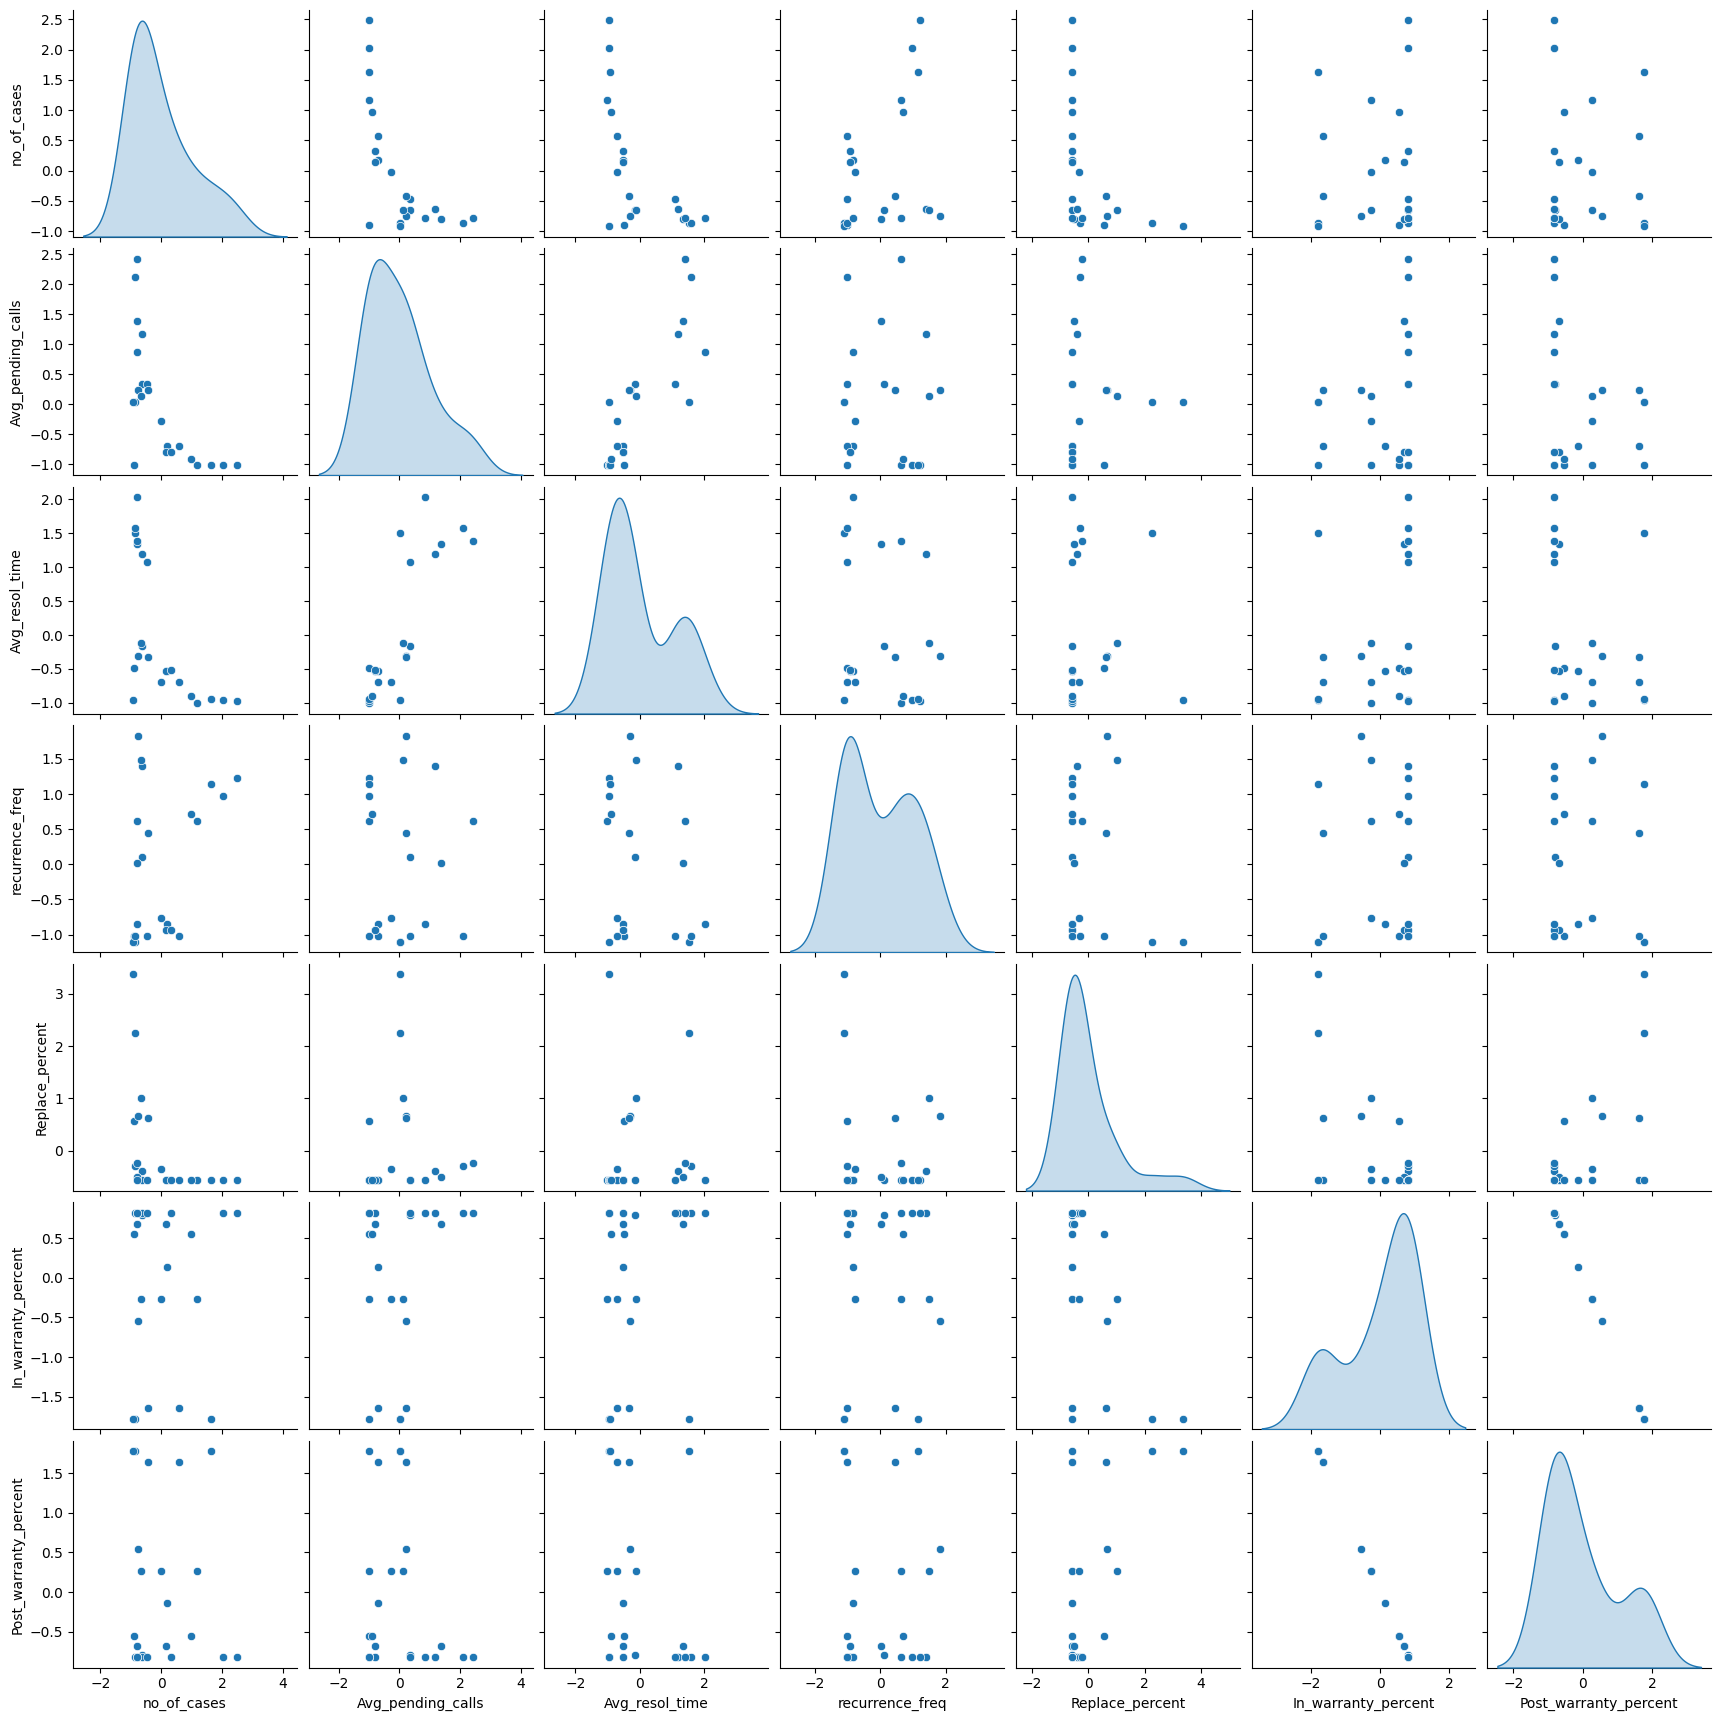

In [21]:
tech_support_attr = tech_support.iloc[ :, 1:]
tech_support_attr.head()
tech_support_scaled = tech_support_attr.apply(zscore)
sns.pairplot(tech_support_scaled, diag_kind='kde')

## Group Data Into Clusters
Now we will use k-means clustering into group data based on their attribute. First we need to determine the optimal number of groups. For that we conduct the knee test to see where it happens

c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

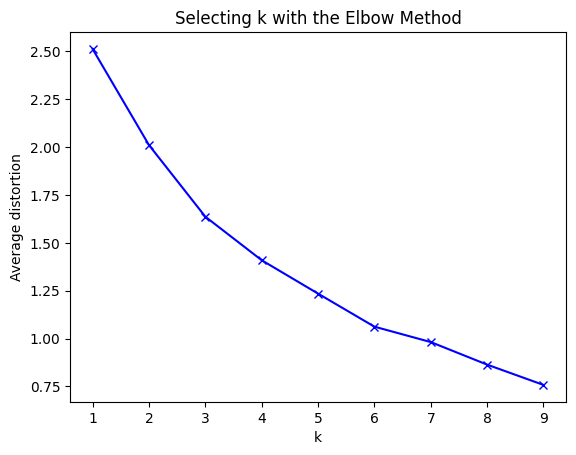

In [22]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(tech_support_scaled)
    prediction=model.predict(tech_support_scaled)
    meanDistortions.append(sum(np.min(cdist(tech_support_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / tech_support_scaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [49]:
final_model = KMeans(3)
final_model.fit(tech_support_scaled)
prediction=final_model.predict(tech_support_scaled)

#Append the prediction
tech_support["GROUP"] = prediction
# convert the group field to int
tech_support_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_support.head()

Groups Assigned : 



c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,0
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,0
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,2


In [50]:
tech_support_grouped = tech_support_scaled.groupby(['GROUP'])  
tech_support_grouped.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
GROUP,,,,,,,,
0,-0.201991,-0.151228,-0.262973,0.240375,0.97053,-1.348020,1.348020,2.0
1,0.709754,-0.839940,-0.735168,-0.105763,-0.41174,0.427028,-0.427028,1.0
2,-0.710550,1.231151,1.208189,-0.104395,-0.44115,0.798984,-0.798984,0.0


array([[<Axes: title={'center': 'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Avg_resol_time'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Group'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'In_warranty_percent'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Post_warranty_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Replace_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'no_of_cases'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'recurrence_freq'}, xlabel='[GROUP]'>]],
      dtype=object)

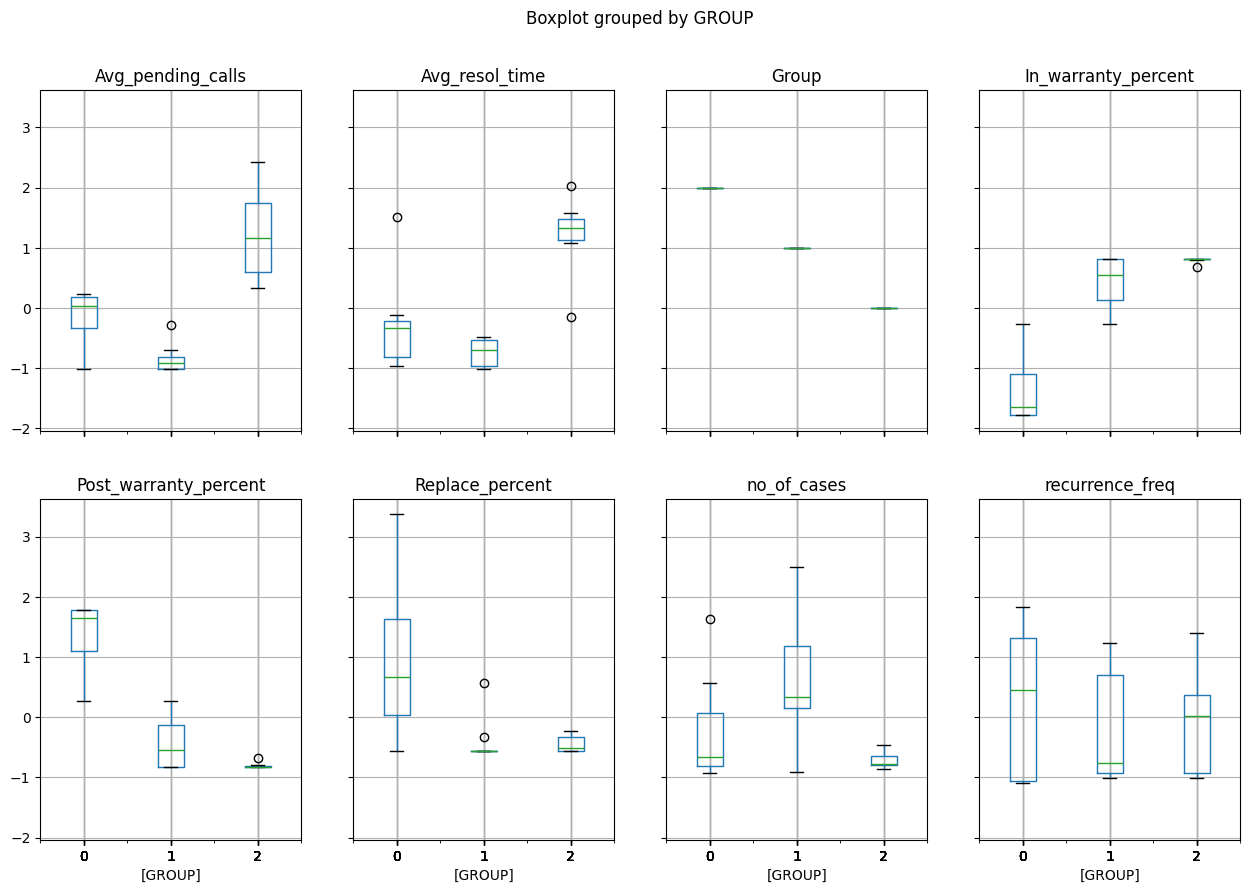

In [51]:
tech_support_scaled.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))